In [1]:
import cv2
import zipfile
import imutils
import os

import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [2]:
with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall("C:/Users/Лейва/Desktop/Projects/Project_7/Lesson_66")

In [3]:
path_1 = "data/without_mask"
path_2 = "data/with_mask"
print(f"Images withot a mask: {len(os.listdir(path_1))}")
print(f"Imahesmage with a mask: {len(os.listdir(path_2))}")

Images withot a mask: 686
Imahesmage with a mask: 690


In [4]:
model = Sequential([
    Conv2D(100, (3,3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation="relu"),
    Dense(2, activation="softmax")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [5]:
TRAINING_DIR = "C:/Users/Лейва/Desktop/Projects/Project_7/Lesson_66/data"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

In [6]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

Found 1376 images belonging to 2 classes.


In [7]:
VALIDATION_DIR = "C:/Users/Лейва/Desktop/Projects/Project_7/Lesson_66/data"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [8]:
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1376 images belonging to 2 classes.


In [9]:
model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


C:\Users\Лейва\AppData\Local\Temp\ipykernel_19888\3981282015.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


138/138 [==============================] - 54s 390ms/step - loss: 0.6177 - acc: 0.6424 - val_loss: 0.3301 - val_acc: 0.9440
Epoch 2/10
138/138 [==============================] - 51s 370ms/step - loss: 0.3496 - acc: 0.8641 - val_loss: 0.1349 - val_acc: 0.9578
Epoch 3/10
138/138 [==============================] - 52s 376ms/step - loss: 0.2643 - acc: 0.8990 - val_loss: 0.1146 - val_acc: 0.9658
Epoch 4/10
138/138 [==============================] - 50s 360ms/step - loss: 0.1999 - acc: 0.9281 - val_loss: 0.0925 - val_acc: 0.9760
Epoch 5/10
138/138 [==============================] - 53s 383ms/step - loss: 0.1824 - acc: 0.9390 - val_loss: 0.0760 - val_acc: 0.9666
Epoch 6/10
138/138 [==============================] - 53s 386ms/step - loss: 0.2218 - acc: 0.9186 - val_loss: 0.1159 - val_acc: 0.9615
Epoch 7/10
138/138 [==============================] - 54s 388ms/step - loss: 0.1607 - acc: 0.9404 - val_loss: 0.0671 - val_acc: 0.9724
Epoch 8/10
138/138 [==============================] - 51s 372ms/st

In [10]:
labels_dict={0:"without mask",1:"mask"}
color_dict={0:(0,0,255),1:(0,255,0)}
size = 4
webcam = cv2.VideoCapture(0)
classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [11]:
while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1)
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))
    faces = classifier.detectMultiScale(mini)
    for f in faces:
        (x, y, w, h) = [v * size for v in f]
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        print(result)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow("LIVE",   im)
    key = cv2.waitKey(10)
    if key == 27: #The Esc key
        break
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 78ms/step
[[0.9801762  0.01982376]]
1/1 [==============================] - 0s 28ms/step
[[0.97693175 0.02306829]]
1/1 [==============================] - 0s 26ms/step
[[0.9784772  0.02152286]]
1/1 [==============================] - 0s 27ms/step
[[0.9784772  0.02152286]]
1/1 [==============================] - 0s 24ms/step
[[0.97647244 0.02352759]]
1/1 [==============================] - 0s 45ms/step
[[0.97810227 0.02189774]]
1/1 [==============================] - 0s 32ms/step
[[0.9848614  0.01513863]]
1/1 [==============================] - 0s 27ms/step
[[0.9899352  0.01006474]]
1/1 [==============================] - 0s 27ms/step
[[0.9956464  0.00435354]]
1/1 [==============================] - 0s 27ms/step
[[0.9928276  0.00717242]]
1/1 [==============================] - 0s 25ms/step
[[0.9739299  0.02607008]]
1/1 [==============================] - 0s 25ms/step
[[0.98314166 0.0168584 ]]
1/1 [==============================] - 0s 25ms/step
[[0.9857224 

In [13]:
image_1 = cv2.imread("with_a_mask.png", cv2.IMREAD_COLOR)
img_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

image_2 = cv2.imread("without_a_mask.png", cv2.IMREAD_COLOR)
img_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

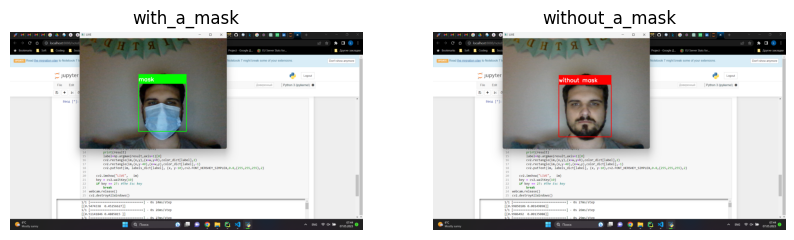

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10,8))
axs[0].imshow(img_1)
axs[0].axis("off")
axs[0].set_title("with_a_mask")
axs[1].imshow(img_2)
axs[1].axis("off")
axs[1].set_title("without_a_mask")
plt.show()